In [ ]:
import statsmodels
statsmodels.__version__

'0.10.2'

#Task 1
A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.
Please assist the consultant in the area of statistical analysis by doing this:
- A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric).
Correlation and ANOVA, if applicable, is a must.
- A graphical analysis of the additives, including a distribution study.
- A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/Jobs/PreScreen_r3/
!ls

/content/gdrive/My Drive/Jobs/PreScreen_r3
1000_histograms.png  palm_ffb_date_f.csv    to_work_ingredients.ipynb
ingredient.csv	     PreScreen_DSAI_r3.pdf
palm_ffb.csv	     PreScreen_r3


In [ ]:
#import Csv file
import pandas as pd

df = pd.read_csv('palm_ffb_date_f.csv')#, parse_dates=['Date'])
df['Date']= pd.to_datetime(df['Date'],dayfirst=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           130 non-null    datetime64[ns]
 1   SoilMoisture   130 non-null    float64       
 2   Average_Temp   130 non-null    float64       
 3   Min_Temp       130 non-null    float64       
 4   Max_Temp       130 non-null    float64       
 5   Precipitation  130 non-null    float64       
 6   Working_days   130 non-null    int64         
 7   HA_Harvested   130 non-null    float64       
 8   FFB_Yield      130 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 9.3 KB


In [ ]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


# Correlation: Explore additives relations 

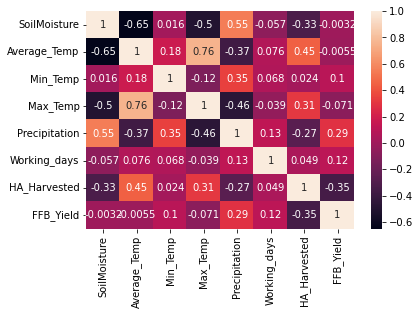

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


Observation: 
- average temp Vs Max temp are positively related. Also as logic suggest moisture and precipication are positively related.
- soilmoisture vs average temp has negative as asssumed. Moistaure seems negatively related to temperature

# Regression seems first try to establish relationship with target variable FFB_Yield

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=df.iloc[:,1:7]
y=df.iloc[:,8]
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.1263180766928369


In [ ]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.9507733551435176
slope: [-0.00114542  0.00062065 -0.01815866  0.00158683  0.00151166  0.01163444]


Poor R sq without date which seems to be important left out variable to exploring the same

#Regression with month as a integer feature

In [ ]:
# Format Date
from datetime import datetime
df["Date"] = df["Date"].dt.strftime("%d.%m.%y")
#pandas.to_datetime() is switching day & month when day is less than 13

In [ ]:
df['Date'] = pd.DatetimeIndex(df['Date']).month


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           130 non-null    int64  
 1   SoilMoisture   130 non-null    float64
 2   Average_Temp   130 non-null    float64
 3   Min_Temp       130 non-null    float64
 4   Max_Temp       130 non-null    float64
 5   Precipitation  130 non-null    float64
 6   Working_days   130 non-null    int64  
 7   HA_Harvested   130 non-null    float64
 8   FFB_Yield      130 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 9.3 KB


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

LinearRegression()

In [ ]:
model = LinearRegression().fit(x, y)


In [ ]:
r_sq = model.score(x, y)

In [ ]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.49133535095052283


*- Huge improvement with comsidering date striped as month as a integer and used as a variable. So it seems date has a huge impact. Lets try to visualize date impact first*

# View impact of date on Target

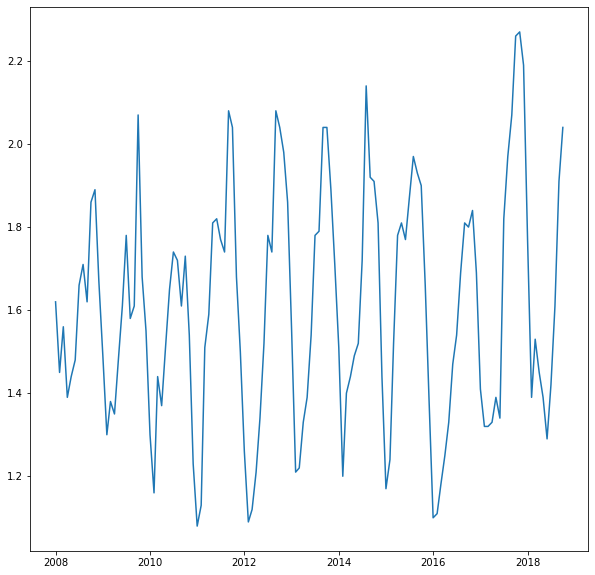

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import sys
plt.plot(df.iloc[:,0], df.iloc[:,-1])

Clearly seen seasonality with time data hence the autocorrelation maybe leaking into the prediction

Linear Regression or ANN models will not work for time series data as time series data are auto regressive i.e. self correlated. A given value of y is influenced by previous values of y in time. 

We can explore auto-correlated residuals by bringing in time based relations and capture auto correlation like ARIMA (or Seasonal ARIMA). 

#Time Series

We’ll build a regression model to predict the FFB_Yeild variable and thereby check how much variation will be explained by the independent variables.

In [ ]:
import pandas as pd
from statsmodels.regression import linear_model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import numpy as np

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#df['DateTimeIndex']= (df['Date'])#, infer_datetime_format=True)
df = df.set_index(keys=['Date'])#.asfreq('D')


In [ ]:
expr = 'FFB_Yield ~ SoilMoisture + Average_Temp + Min_Temp + Max_Temp + Precipitation + Working_days + HA_Harvested'

In [ ]:
dataset_len = len(df)
split_index = round(dataset_len*0.9)
train_set_end_date = df.index[split_index]
df_train = df.loc[df.index <= train_set_end_date].copy()
df_test = df.loc[df.index > train_set_end_date].copy()
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [ ]:
olsr_results = linear_model.OLS(y_train, X_train).fit()

In [ ]:
olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              FFB_Yield   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     4.632
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           0.000142
Time:                        10:15:12   Log-Likelihood:                0.45891
No. Observations:                 118   AIC:                             15.08
Df Residuals:                     110   BIC:                             37.25
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.7968      1.556      1.798      0.075      -0.286       5.880
SoilMoisture     -0.0011      0.001     -1.922      0.057      -0.002    3.47e-05
Average_Temp      0.1109      0.072      1.549      0.124      -0.031       0.253
Min_Temp         -0.0270      0.041     -0.655      0.514      -0.109       0.055
Max_Temp         -0.0294      0.037     -0.800      0.425      -0.102       0.043
Precipitation     0.0011      0.000      2.728      0.007       0.000       0.002
Working_days      0.0104      0.019      0.536      0.593      -0.028       0.049
HA_Harvested  -3.139e-06    7.8e-07     -4.025      0.000   -4.68e-06   -1.59e-06
==============================================================================
Omnibus:                        1.309   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.271
Skew:                          -0.138   Prob(JB):                        0.530
Kurtosis:                       2.573   Cond. No.                     5.36e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### We see that the regression coefficients of both regression variables  Precipitation, HA_Harvested are significant at a 99% confidence level as indicated by their P values (P > |t| column).
- The Durbin-Watson statistic will always have a value ranging between 0 and 4. A value of 2.0 indicates there is no autocorrelation detected in the sample. Values from 0 to less than 2 point to positive autocorrelation and values from 2 to 4 means negative autocorrelation.
 - We found DW test statistic is 0.56 indicating a positive auto-correlation among the residual errors of regression at LAG-1. This was completely expected since the underlying data is a time series and the linear regression model has failed to explain the auto-correlation in the dependent variable. The DW test statistic just confirms it.

# Exploring for parameters (p,d,q), (P,D,Q) and m






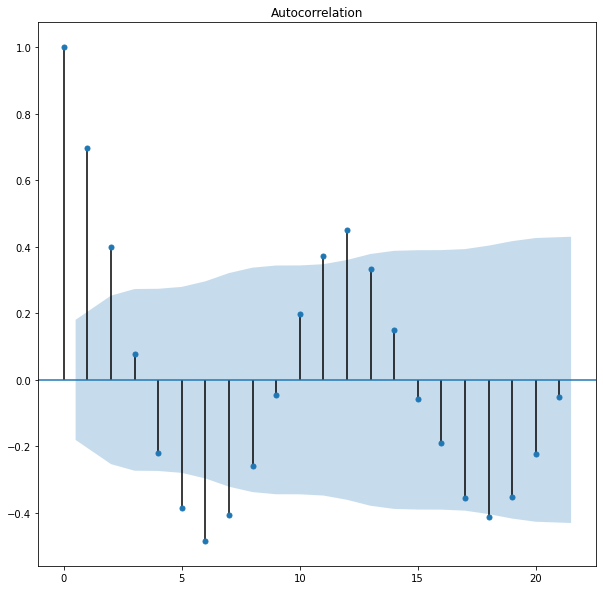

In [ ]:
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

There are strong auto-correlations extending out to multiple lags indicating that the residual errors time series has a trend. We’ll need to de-trend this time series by using one or possibly 2 orders of differencing. Thus, the parameter d is likely to be 1, or possibly 2.
The wavelike pattern in the ACF evidences a seasonal variation in the data.
The peak at LAG = 12 indicates that the seasonal period is likely to be 12 month which is similiar to physiology of palm yeild. So 'm' is likely to be 12.

We’ll soon verify this guess using the time series decomposition plot.
Quick note: the LAG-0 autocorrelation will always be a perfect 1.0 and can be ignored as a value is perfectly correlated with itself.

In [ ]:
#Before we estimate the rest of the (S)ARIMA parameters, let’s difference the time series once i.e. d=1:

olsr_resid_diff_1 = olsr_results.resid.diff()
olsr_resid_diff_1 = olsr_resid_diff_1.dropna()

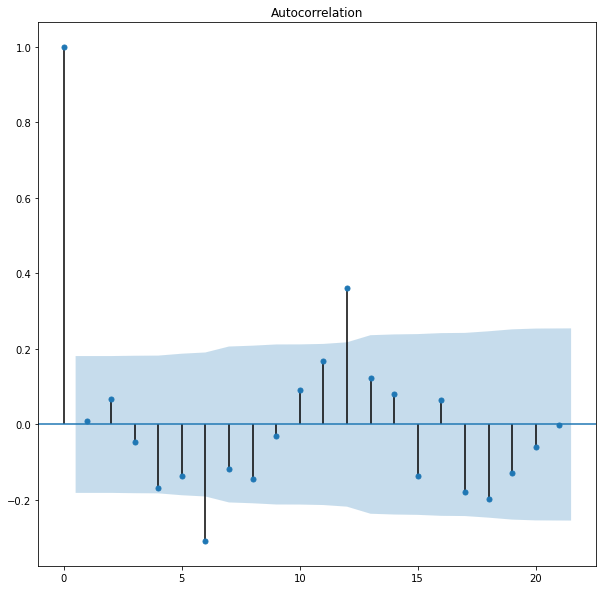

In [ ]:
#Let’s replot the ACF of the differenced time series of residual errors:

tsa.plot_acf(olsr_resid_diff_1, alpha=0.05)
plt.show()

> We see that there is still a significant auto-correlation at LAG-1 in the differenced time series. We could try extinguishing it by taking one more difference, i.e. d=2 and plotting the resulting time series’ ACF:


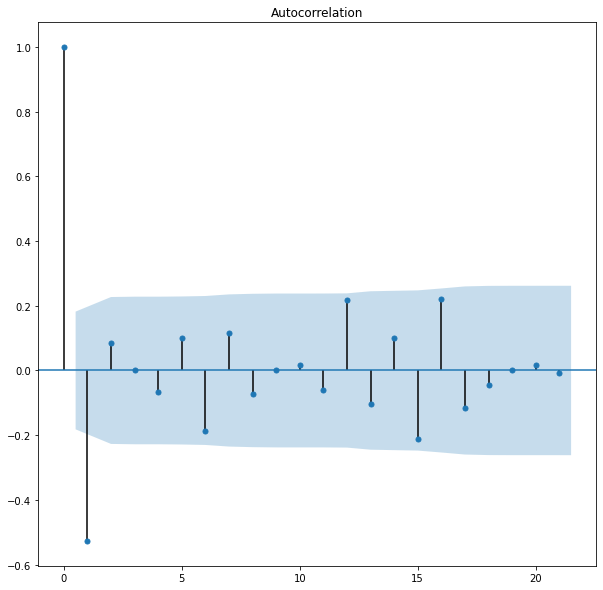

In [ ]:
# Diff 2
olsr_resid_diff_2 = olsr_resid_diff_1.diff()
olsr_resid_diff_2 = olsr_resid_diff_2.dropna()
tsa.plot_acf(olsr_resid_diff_2, alpha=0.05)
plt.show()


>Unfortunately, differencing the time series a second time has produced a heavy negative auto-correlation at LAG-1. This is bad sign. We seem to have over-done the differencing. We should stick with d=1.

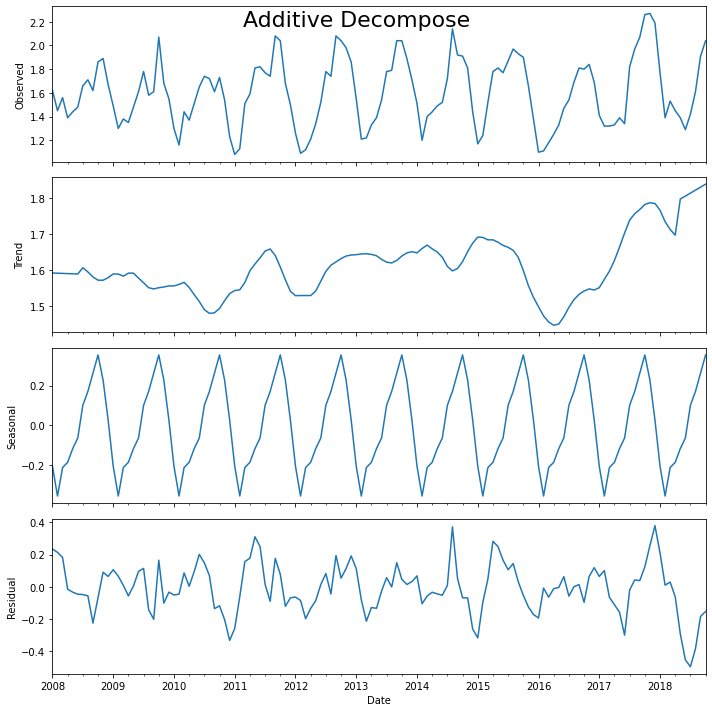

In [ ]:
result_add = seasonal_decompose(x=df['FFB_Yield'], model='additive', extrapolate_trend='freq')
plt.rcParams.update({'figure.figsize': (10,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

# Additive Model
# An additive model suggests that the components are added together as follows:
# y(t) = Level + Trend + Seasonality + Noise

>Here we can see that the range of trend and residual is nominal, or we can say that trend is having variation between 1.5 to 1.7, and most of the time residual is having the variation around 0. But for the seasonality, we can see that it varies between 0 to 0.3, which is a high difference range.

>To perform forecasting using the ARIMA model, we required a stationary time series. Stationary time series is a time series that is unaffected by these four components. Most often, it happens when the data is non-stationary the predictions we get from the ARIMA model are worse or not that accurate.

If the data is not stationary, we can do one thing: either make the data stationary or use the SARIMAX model.

##ADFuller test for stationary series
>To know more about the time series stationarity, we can perform the ADfuller test, a test based on hypothesis, where if the p-value is less than 0.05, then we can consider the time series is stationary, and if the P-value is greater than 0.05, then the time series is non-stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.FFB_Yield, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
  print("\t",key, ": ", val)

1. ADF :  -2.908188932083809
2. P-Value :  0.04440398949131907
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 117
5. Critical Values :
	 1% :  -3.487517288664615
	 5% :  -2.8865777180380032
	 10% :  -2.5801239192052012


> p value is significant at 0.05 so its our choice to check with 1 difference or not, lets try

In [ ]:
df['diff1']= df['FFB_Yield'].diff()[1:]
#df['diff1'].plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(df.diff1.dropna(), autolag = 'AIC')
print("1. ADF : ",dftest1[0])
print("2. P-Value : ", dftest1[1])
print("3. Num Of Lags : ", dftest1[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest1[3])
print("5. Critical Values :")
for key, val in dftest1[4].items():
  print("\t",key, ": ", val)

1. ADF :  -4.629421329791568
2. P-Value :  0.00011396655635926026
3. Num Of Lags :  11
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 117
5. Critical Values :
	 1% :  -3.487517288664615
	 5% :  -2.8865777180380032
	 10% :  -2.5801239192052012


>here after differencing we can see p value is significant to we have choice to stay without differencing too

In [ ]:
# components = seasonal_decompose(olsr_results.resid)
# components.plot()

The seasonal component confirms that m=12.

In [ ]:
arima_model = ARIMA(endog=df.FFB_Yield, order=(1,0,1))#, exog=X_train_minus_intercept,seasonal_order=(0,1,1,12))
#p is AR term, q is MA term, d is differencing required to make the time series stationary
arima_results = arima_model.fit()
arima_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              FFB_Yield   No. Observations:                  130
Model:                     ARMA(1, 1)   Log Likelihood                  49.796
Method:                       css-mle   S.D. of innovations              0.164
Date:                Mon, 07 Mar 2022   AIC                            -91.593
Time:                        10:33:22   BIC                            -80.123
Sample:                    01-01-2008   HQIC                           -86.932
                         - 10-01-2018                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.6113      0.057     28.178      0.000       1.499       1.723
ar.L1.FFB_Yield     0.6531      0.078      8.338      0.000       0.500       0.807
ma.L1.FFB_Yield     0.3991      0.091      4.379      0.000       0.220       0.578
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5312           +0.0000j            1.5312            0.0000
MA.1           -2.5059           +0.0000j            2.5059            0.5000
-----------------------------------------------------------------------------
"""

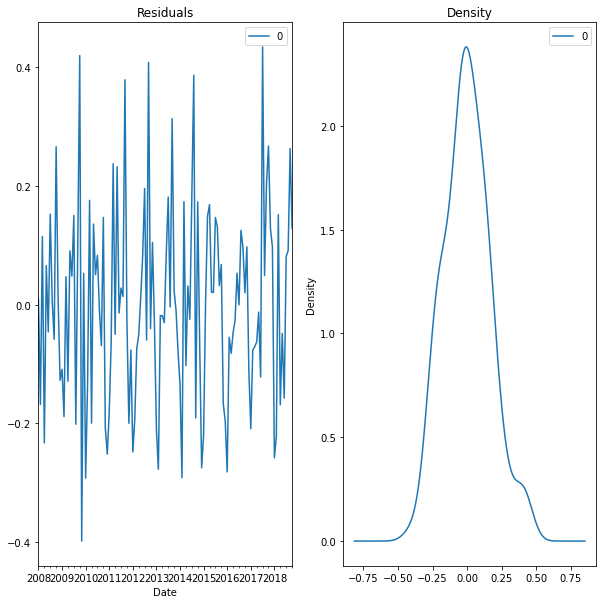

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(arima_results.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

> residuals seems ok near 0 mean and uniform variance so seems ok to proceed

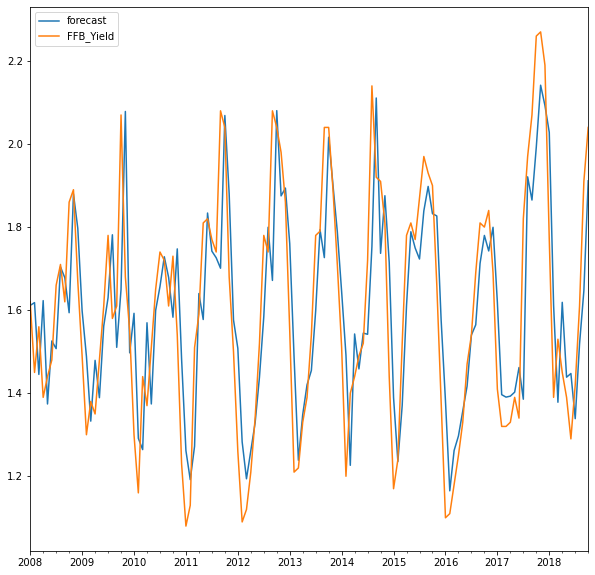

In [ ]:
# Actual vs Fitted
arima_results.plot_predict(dynamic=False)
#dynamic=False the in-sample lagged values are used for prediction.
plt.show()

#test prediction

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


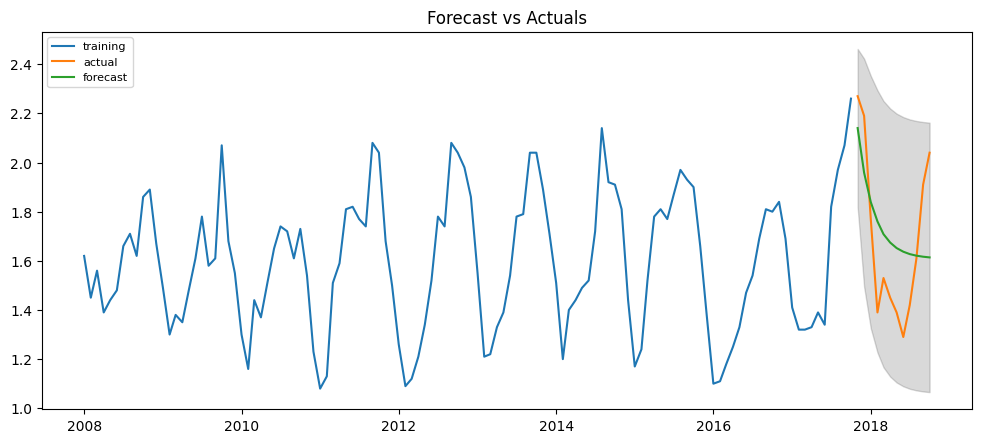

In [ ]:
# Build Model
#model = ARIMA(train, order=(3,2,1))  
model = ARIMA(y_train, order=(1, 0, 1))  
fitted = model.fit()#(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(12, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=y_test.index)
lower_series = pd.Series(conf[:, 0], index=y_test.index)
upper_series = pd.Series(conf[:, 1], index=y_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

#Sarimax
-Trend Elements
p: Trend autoregression order.
d: Trend difference order.
q: Trend moving average order.
Seasonal Elements
-There are four seasonal elements:
P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period.

-Together, the notation for an SARIMA model is specified as:
SARIMA(p,d,q)(P,D,Q)m

In [ ]:
df = df.asfreq('M')
df = df.fillna(df.mean())
dataset_len = len(df)
split_index = round(dataset_len*0.9)
train_set_end_date = df.index[split_index]
df_train = df.loc[df.index <= train_set_end_date].copy()
df_test = df.loc[df.index > train_set_end_date].copy()

In [ ]:
X_train_minus_intercept = X_train.drop('Intercept', axis=1)
X_train_minus_intercept = X_train_minus_intercept.asfreq('D')
X_train_minus_intercept=X_train_minus_intercept.dropna()
#y_train = y_train.asfreq('H')

In [ ]:
y_train
X_train_minus_intercept.isnull().sum()

SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
dtype: int64

In [ ]:
y=list(y_train)
from statsmodels.tsa.statespace.sarimax import SARIMAX as SARIMAX

sarimax_model = SARIMAX(endog=y_train, order=(1,0,1), 
                        seasonal_order=(1,1,1,12)) #(Seasonal AR specification, seas Integration order, seas MA, Seas periodicity)
sarimax_results = sarimax_model.fit()
sarimax_results.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                          FFB_Yield   No. Observations:                  118
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                  62.279
Date:                            Mon, 07 Mar 2022   AIC                           -114.557
Time:                                    11:26:17   BIC                           -101.240
Sample:                                01-01-2008   HQIC                          -109.160
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.134      4.626      0.000       0.358       0.884
ma.L1          0.1205      0.168      0.718      0.473      -0.208       0.449
ar.S.L12       0.2558      0.194      1.316      0.188      -0.125       0.637
ma.S.L12      -0.9861      2.459     -0.401      0.688      -5.806       3.833
sigma2         0.0148      0.035      0.429      0.668      -0.053       0.083
===================================================================================
Ljung-Box (Q):                       40.53   Jarque-Bera (JB):                 9.36
Prob(Q):                              0.45   Prob(JB):                         0.01
Heteroskedasticity (H):               0.86   Skew:                             0.48
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

>Ljung Box Test-The null hypothesis of the Box Ljung Test, H0, is that our model does not show lack of fit (or in simple terms—the model is just fine). The alternate hypothesis, Ha, is just that the model does show a lack of fit.

> A significant p-value in this test rejects the null hypothesis that the time series isn’t autocorrelated. So we are unable to reject null hypothesis.
Secondly i have AR L1 is significant to convey the autoregression with previous point.

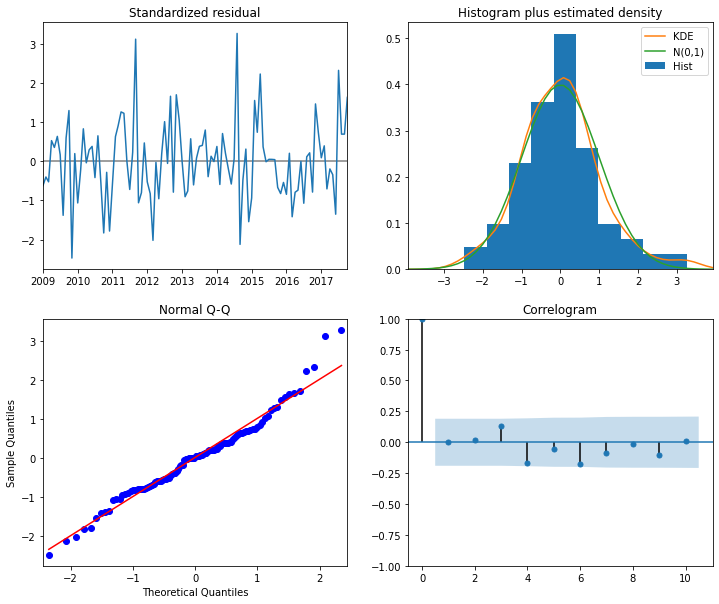

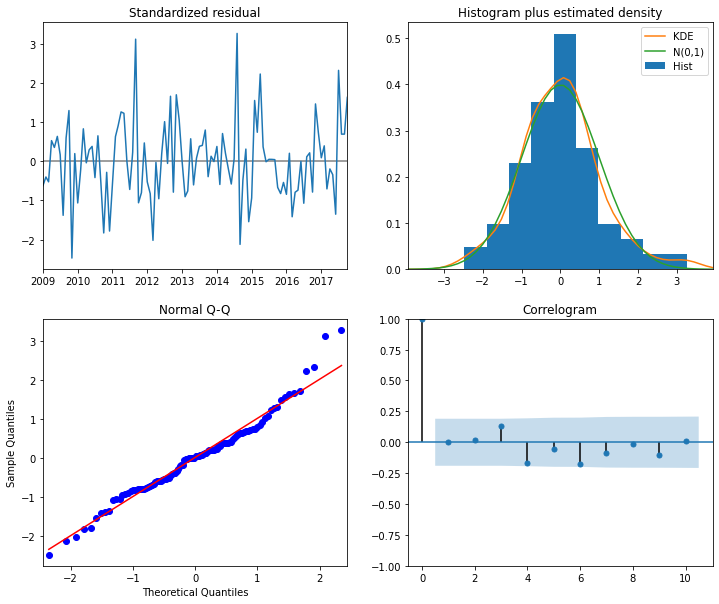

In [ ]:
sarimax_results.plot_diagnostics(figsize=(12,10))

>residual normally distributed and spread around 0 so we are good

#prediction-Sarimax

In [ ]:
X_test_minus_intercept = X_test.drop('Intercept', axis=1)
X_test_minus_intercept = X_test_minus_intercept.asfreq('D')
#y_test = y_test.asfreq('D')
X_test_minus_intercept=X_test_minus_intercept.dropna()
# X_train_minus_intercept = X_train.drop('Intercept', axis=1)
# X_train_minus_intercept = X_train_minus_intercept.asfreq('D')
# X_train_minus_intercept=X_train_minus_intercept.dropna()

In [ ]:
predictions = sarimax_results.get_forecast(steps=12,
                                           exog=X_test_minus_intercept[:12])
predictions.summary_frame()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:1935: ValueWarning: Exogenous array provided to predict, but additional data not required. `exog` argument ignored.
  ' required. `exog` argument ignored.', ValueWarning)


FFB_Yield,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-11-01,2.054727,0.126921,1.805967,2.303486
2017-12-01,1.768743,0.157789,1.459482,2.078004
2018-01-01,1.467736,0.167836,1.138784,1.796688
2018-02-01,1.313382,0.171647,0.976960,1.649805
2018-03-01,1.393840,0.173094,1.054583,1.733097
2018-04-01,1.406047,0.173648,1.065704,1.746390
2018-05-01,1.481663,0.173861,1.140903,1.822424
2018-06-01,1.514311,0.173942,1.173391,1.855231
2018-07-01,1.771374,0.173972,1.430395,2.112353
2018-08-01,1.854529,0.173980,1.513534,2.195524


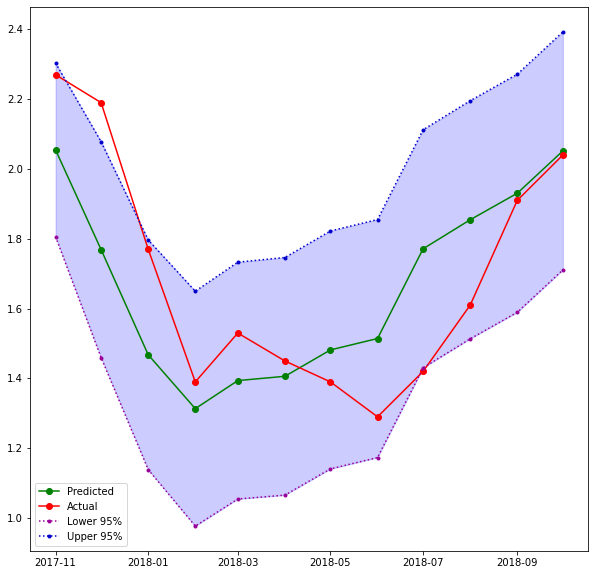

In [ ]:
predicted, = plt.plot(X_test_minus_intercept[:12].index, predictions.summary_frame()['mean'], 'go-', label='Predicted')
 
actual, = plt.plot(X_test_minus_intercept[:12].index, y_test[:12], 'ro-', label='Actual')
 
lower, = plt.plot(X_test_minus_intercept[:12].index, predictions.summary_frame()['mean_ci_lower'], color='#990099', marker='.', linestyle=':', label='Lower 95%')
 
upper, = plt.plot(X_test_minus_intercept[:12].index, predictions.summary_frame()['mean_ci_upper'], color='#0000cc', marker='.', linestyle=':', label='Upper 95%')
 
plt.fill_between(X_test_minus_intercept[:12].index, predictions.summary_frame()['mean_ci_lower'], predictions.summary_frame()['mean_ci_upper'], color = 'b', alpha = 0.2)
 
plt.legend(handles=[predicted, actual, lower, upper])
 
plt.show()


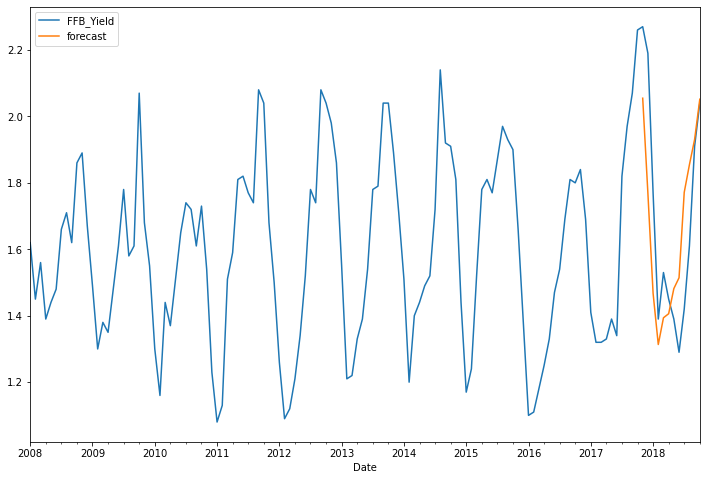

In [ ]:
df['forecast']=sarimax_results.predict(start=118,end=130,dynamic=True)
df[['FFB_Yield','forecast']].plot(figsize=(12,8))

In [ ]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residual12/y_test['FFB_Yield'])),4))


Mean Absolute Percent Error: 0.1073


In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residual12**2)))

Root Mean Squared Error: 0.22061231993226002


#Conclusion

> Above analysis shows that the analysis shows that most of the variation in the FFB yield can be explained by the timeseries itself. FFB yield has a 12 month cycle so I chose m =12, meanwhile i tried converting the date column to Numeric and then use it as a feature which leds to 4 fold improvement in R sq. This seems to be ablve to map the autocorrelation using this method. 
> Arima was not ablve to perform well for seasonality component which was mapped using SARIMA and I got good RMSE value too. I feel some longer duration of the same variables cna be used to predict/forecast FFB_Yield in more robust manner.